#**House Prices Analysis Predection using CRISP-DM workflow for Mini-Project Spark**

Developer : Ahmad Triadi Julianto M

Role      : Machine Learning Engineer

Email     : triadim.works@gmail.com

#Installation

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Data Understanding

There are the 21 features (columns) and their meanings:

`id`: A unique identifier for each house.

`date`: The date the house was sold (in the format YYYYMMDD).

`price`: The price of the house (target variable for prediction).

`bedrooms`: The number of bedrooms in the house.

`bathrooms`: The number of bathrooms in the house.

`sqft_living`: The square footage of the living space in the house.

`sqft_lot`: The size of the lot in square feet.

`floors`: The number of floors in the house.

`waterfront`: Whether the house is on the waterfront (1 = Yes, 0 = No).

`view`: A score from 0 to 4 on the quality of the view.

`condition`: A condition rating from 1 to 5, where 1 is poor and 5 is excellent.

`grade`: A grade rating based on the building's construction and design quality.

`sqft_above`: The square footage of the house excluding the basement.
sqft_basement: The square footage of the basement.

`yr_built`: The year the house was built.

`yr_renovated`: The year the house was last renovated (0 if never renovated).

`zipcode`: The ZIP code of the property.

`lat`: The latitude of the property (geographical location).

`long`: The longitude of the property (geographical location).

`sqft_living15`: The square footage of the living space in the nearest 15 neighbors.

`sqft_lot15`: The size of the lot in the nearest 15 neighbors.

#Data Preparation

##Dataset

In [107]:
df = pd.read_csv('/content/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [60]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(21613, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64

In [108]:
df = df.drop(['id','date'], axis = 1)

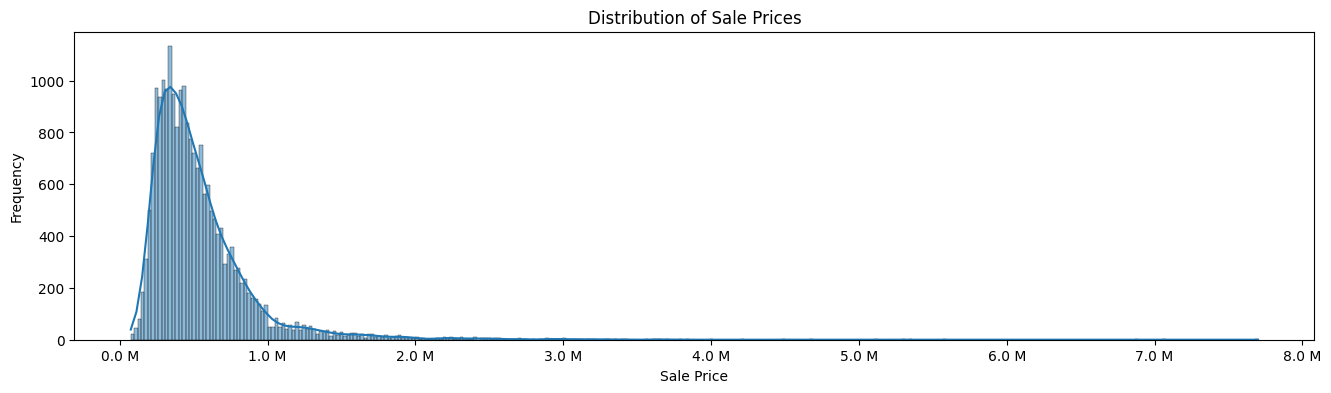

In [29]:
plt.figure(figsize=(16, 4))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

formatter = FuncFormatter(lambda x, pos: '{:.1f} M'.format(x * 1e-6))
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

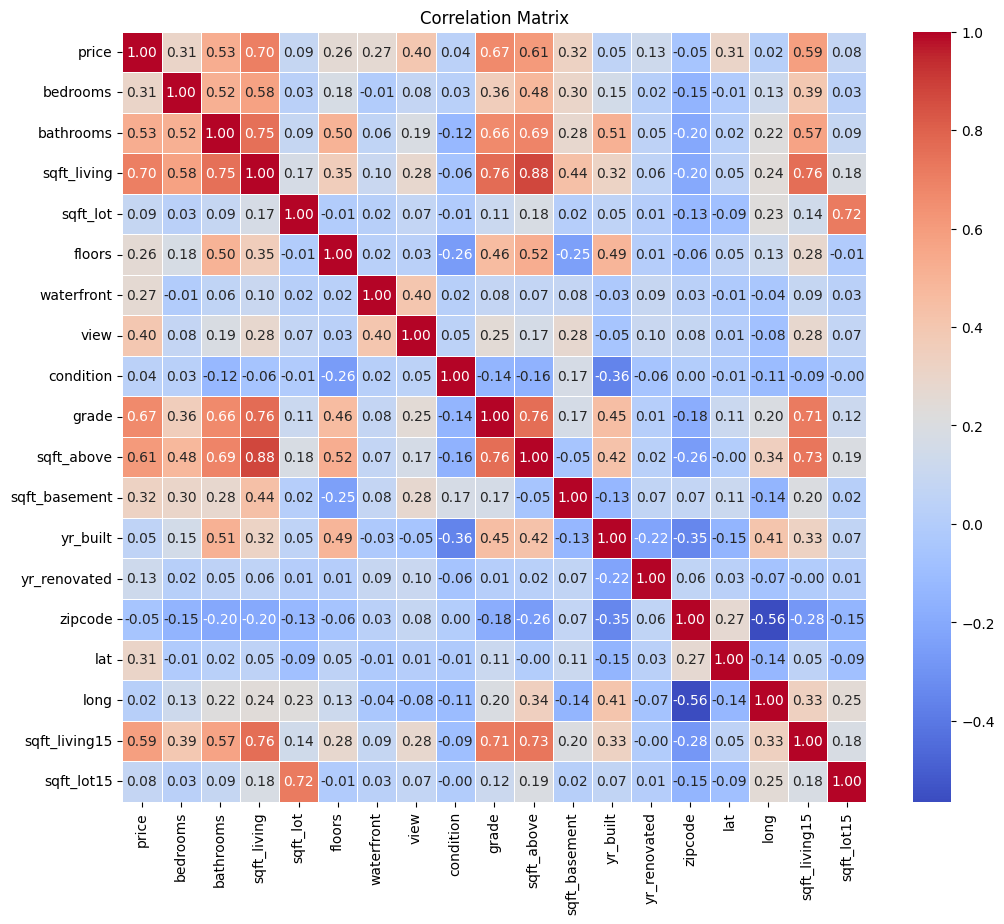

In [32]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

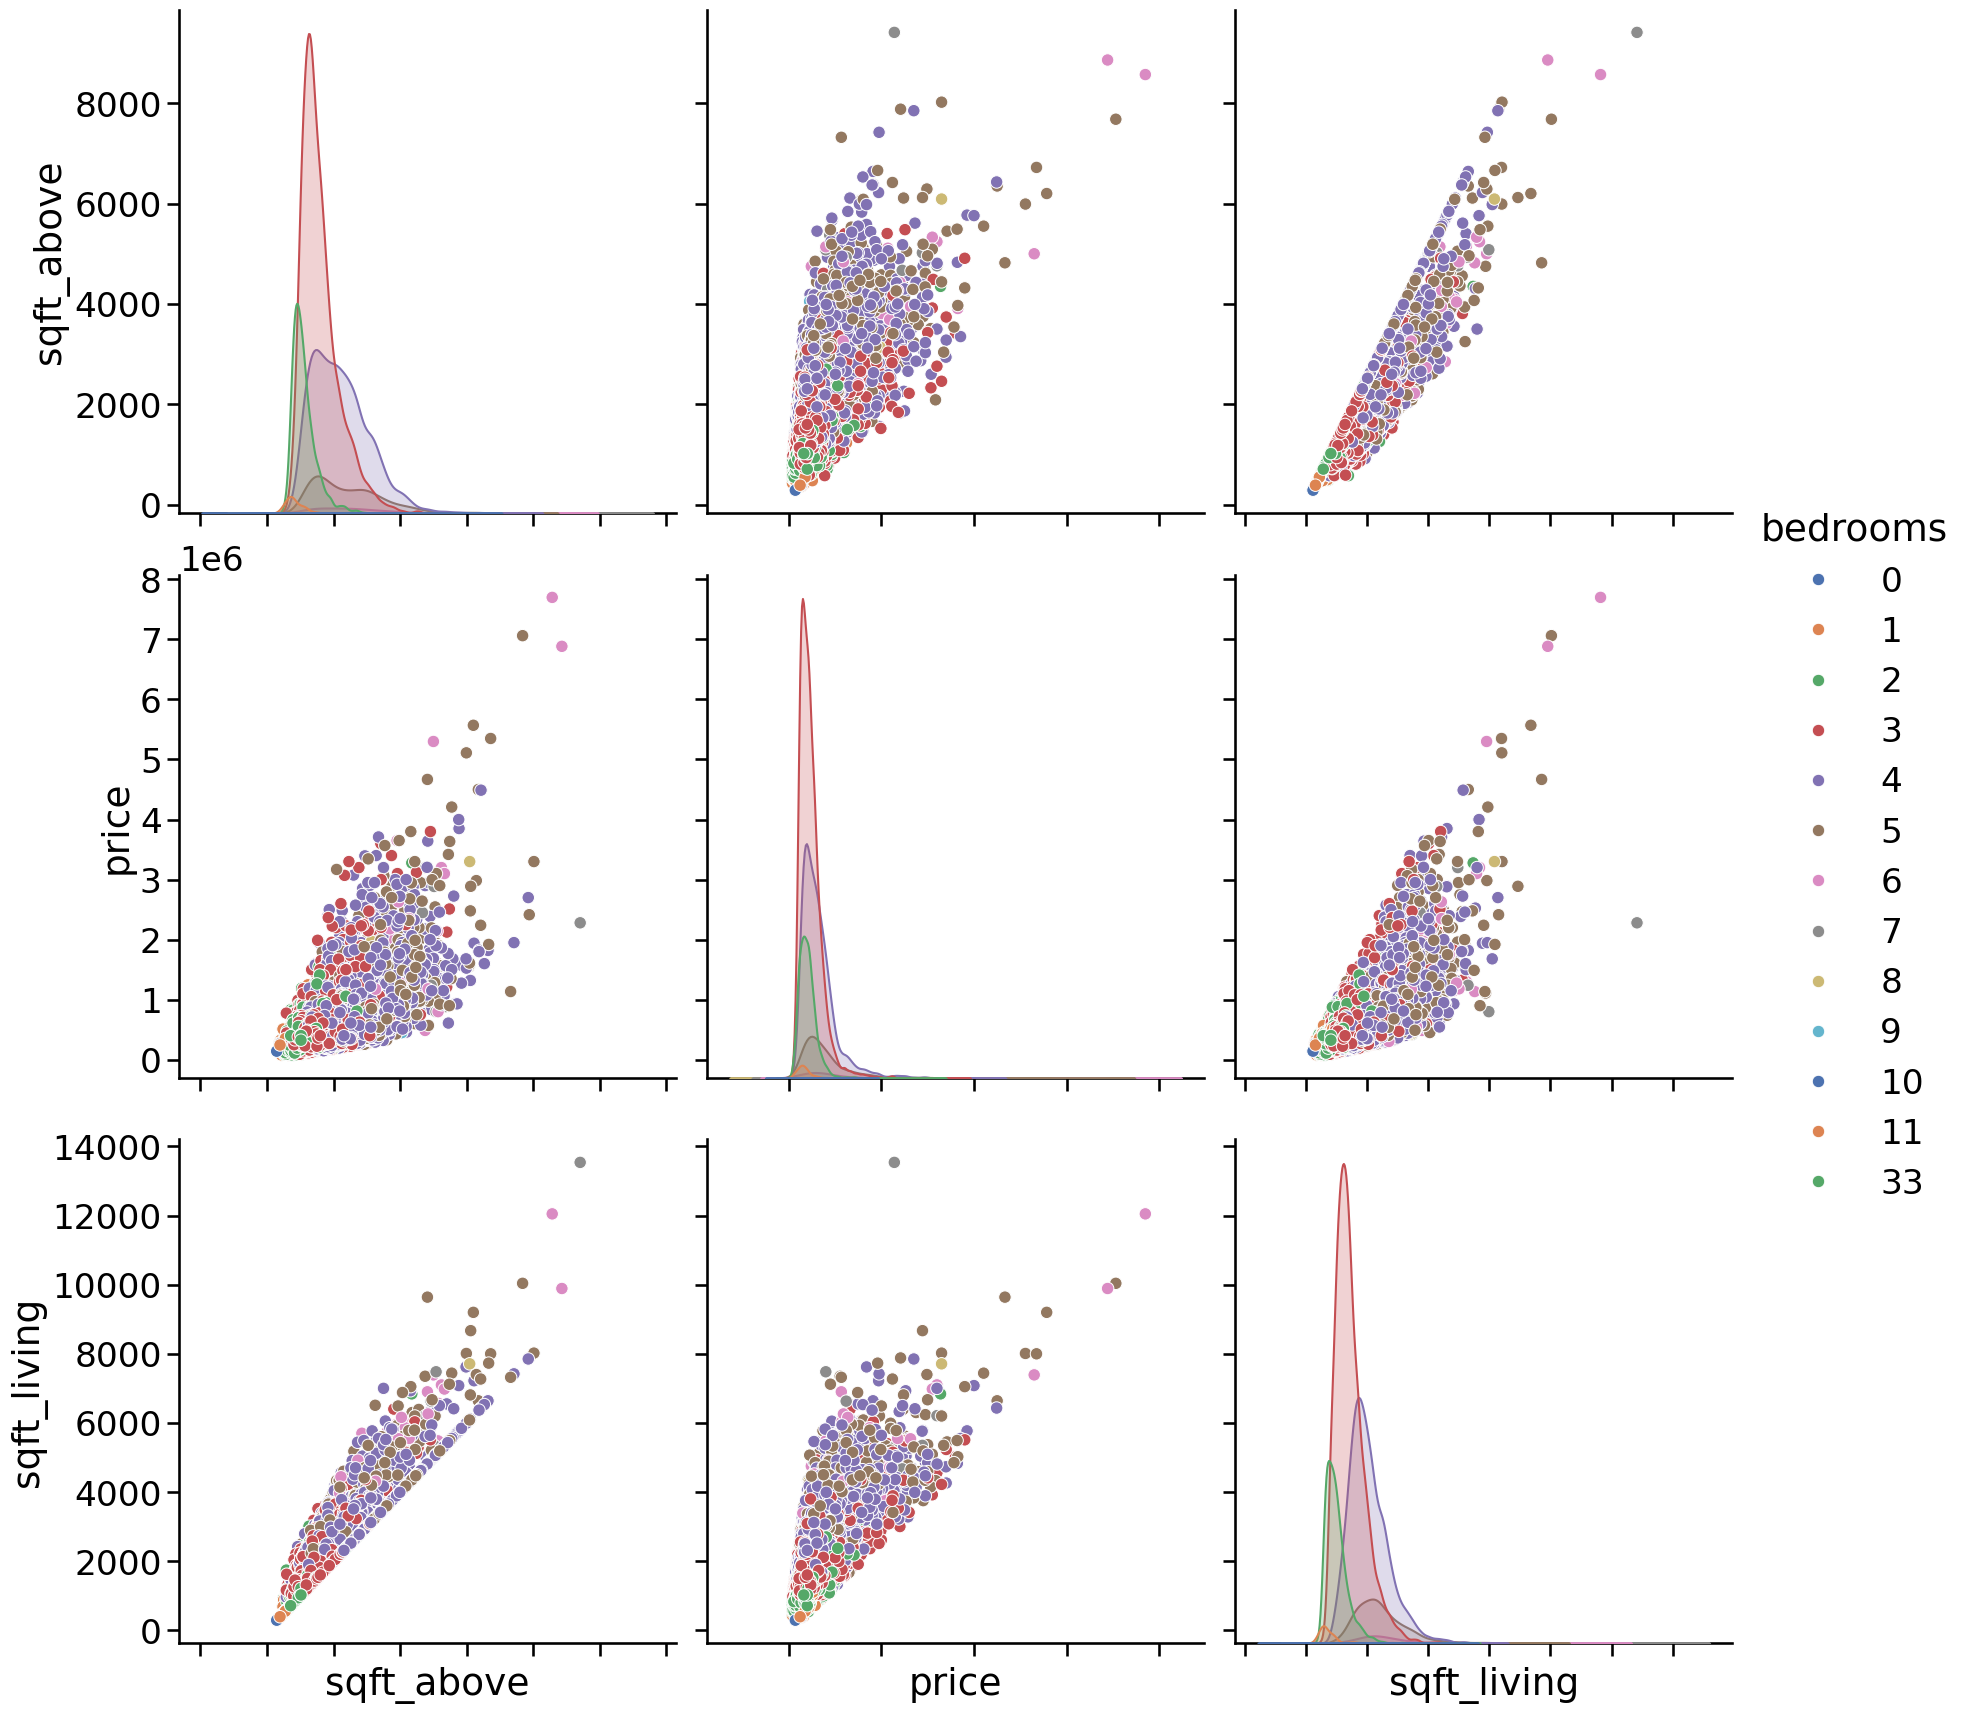

In [21]:
with sns.plotting_context("talk", font_scale=1.5):
    # Create pairplot for the selected features
    g = sns.pairplot(df[[ 'sqft_above', 'price', 'sqft_living', 'bedrooms']],
                     hue='bedrooms', palette='deep', height=6)

    # Remove x-tick labels for clarity
    g.set(xticklabels=[])

# Show the plot
plt.show()

In [109]:
df['log_price'] = np.log1p(df['price'])

In [110]:

Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_sqft_living = df['sqft_living'].quantile(0.25)
Q3_sqft_living = df['sqft_living'].quantile(0.75)
IQR_sqft_living = Q3_sqft_living - Q1_sqft_living


lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

lower_bound_sqft_living = Q1_sqft_living - 1.5 * IQR_sqft_living
upper_bound_sqft_living = Q3_sqft_living + 1.5 * IQR_sqft_living


df_clean = df[(df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price) &
              (df['sqft_living'] >= lower_bound_sqft_living) & (df['sqft_living'] <= upper_bound_sqft_living)]
print(f'Original data size: {df.shape[0]}')
print(f'Cleaned data size: {df_clean.shape[0]}')


Original data size: 21613
Cleaned data size: 20292


#Modeling

In [113]:
X = df_clean[['sqft_living']]
y = df_clean['log_price']

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluation

In [116]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.12536010866025904
Root Mean Squared Error (RMSE): 0.35406229488644936


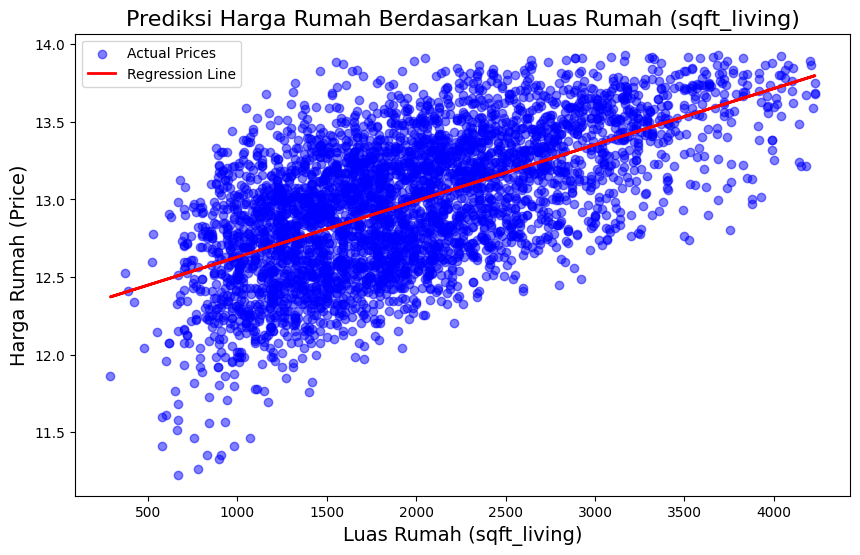

In [117]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices', alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Prediksi Harga Rumah Berdasarkan Luas Rumah (sqft_living)', fontsize=16)
plt.xlabel('Luas Rumah (sqft_living)', fontsize=14)
plt.ylabel('Harga Rumah (Price)', fontsize=14)
plt.legend()
plt.show()